<center> <u> <h1> Liver Patient Perdiction </h1> </u> </center>

## Problem Statement

    The given dataset is related to Indian patients who have been tested for a liver disease. Based on chemical compounds (bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT, SGPT the outcome mentioned is whether person is a patient i.e, whether he needs to be diagnosed further or not. Perform data cleansing, and required transformations and build a predictive model which will be able to predict most of the cases accurately.

# Loading and Exporing the data.

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Loading the Data
liver_data = pd.read_csv('IndianLiverPatientData.txt', sep="\t", header=None)
liver_data.columns = ["Id","Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase",
                    "Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens",
                    "Albumin","Albumin_and_Globulin_Ratio","Class"]

In [3]:
# Checking the data
liver_data.head()

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [4]:
# Removing the id Variable
liver_data = liver_data.drop(["Id"],axis=1)
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [5]:
# Checking the info
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        563 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                568 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Class                         583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [6]:
# Describe gives statistical information about NUMERICAL columns in the dataset
print(liver_data.describe())
print (liver_data.shape)

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      568.000000   
mean                  80.713551                  109.910806        6.483979   
std                  182.620356                  288.918529 

# Handling Missing Values

In [7]:
# Checking For Null Values
liver_data.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [8]:
# Replacing the missing values with mode.
liver_data["Gender"].fillna(liver_data["Gender"].mode()[0],
                               inplace=True)

In [9]:
# Replacing the missing values with mean.
for value in ['Total_Protiens', 'Albumin_and_Globulin_Ratio']:
    liver_data[value].fillna(liver_data[value].mean(),
                               inplace=True)

In [10]:
#  Again Checking For Null Values
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

# Data Visualizations

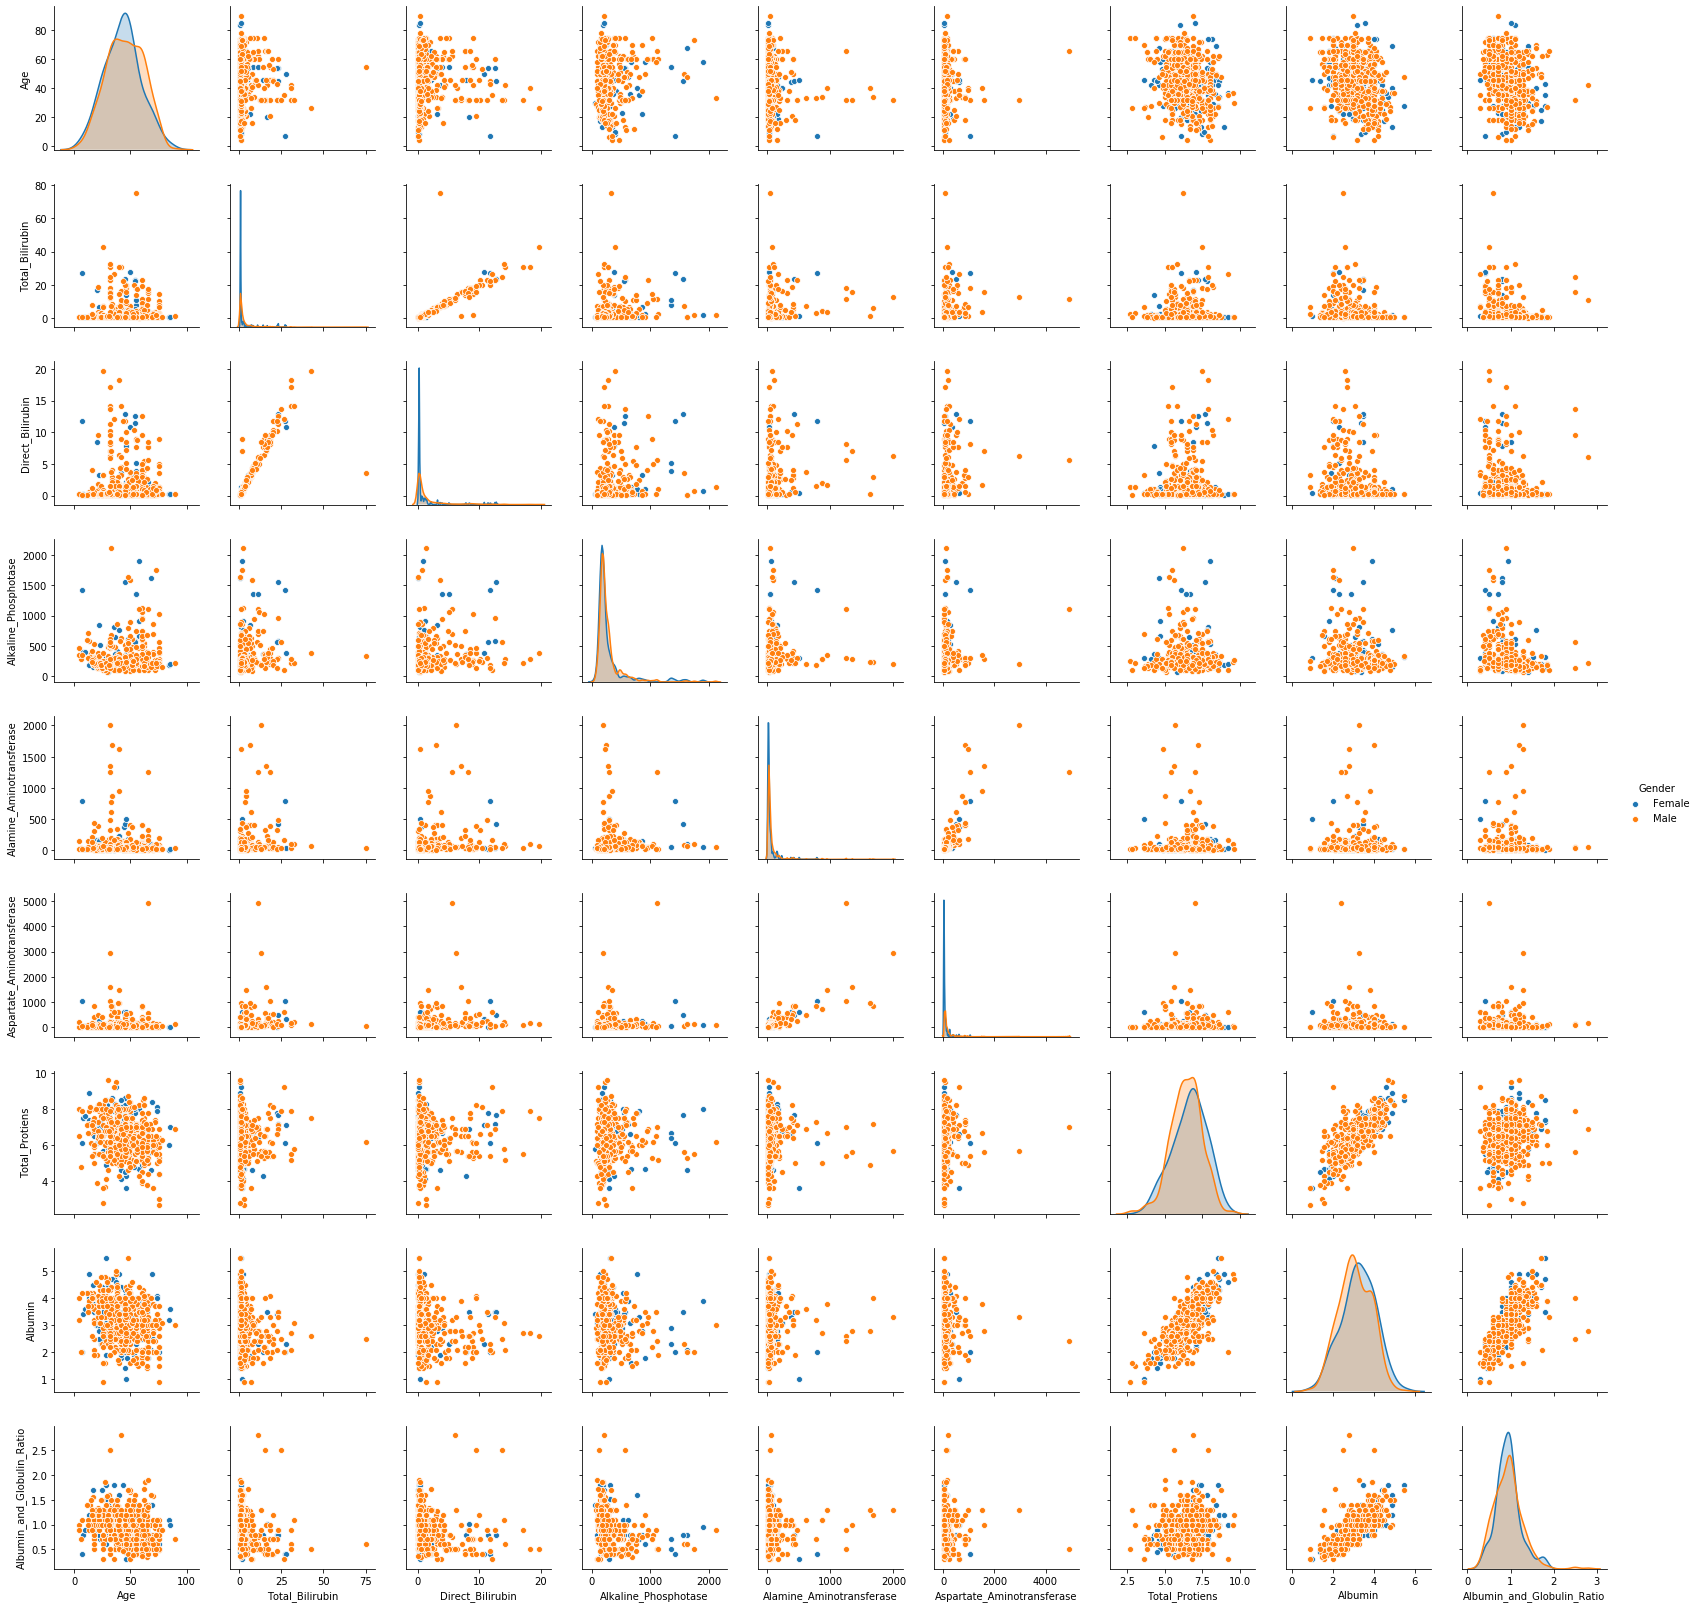

In [11]:
# Pairplots
sns.pairplot(liver_data,hue='Gender')

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


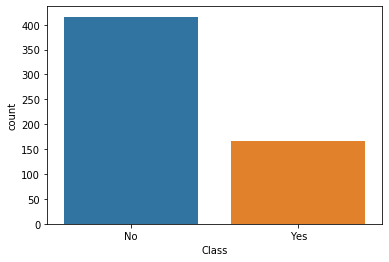

In [12]:
# Count Plot showing number patients with liver disease and no liver disease.

sns.countplot(data=liver_data, x = 'Class', label='Count')

LD, NLD = liver_data['Class'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


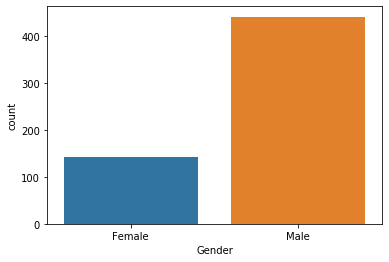

In [13]:
# Bar graph showing number of patients according to the Gender.
sns.countplot(data=liver_data, x = 'Gender', label='Count')

M, F = liver_data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

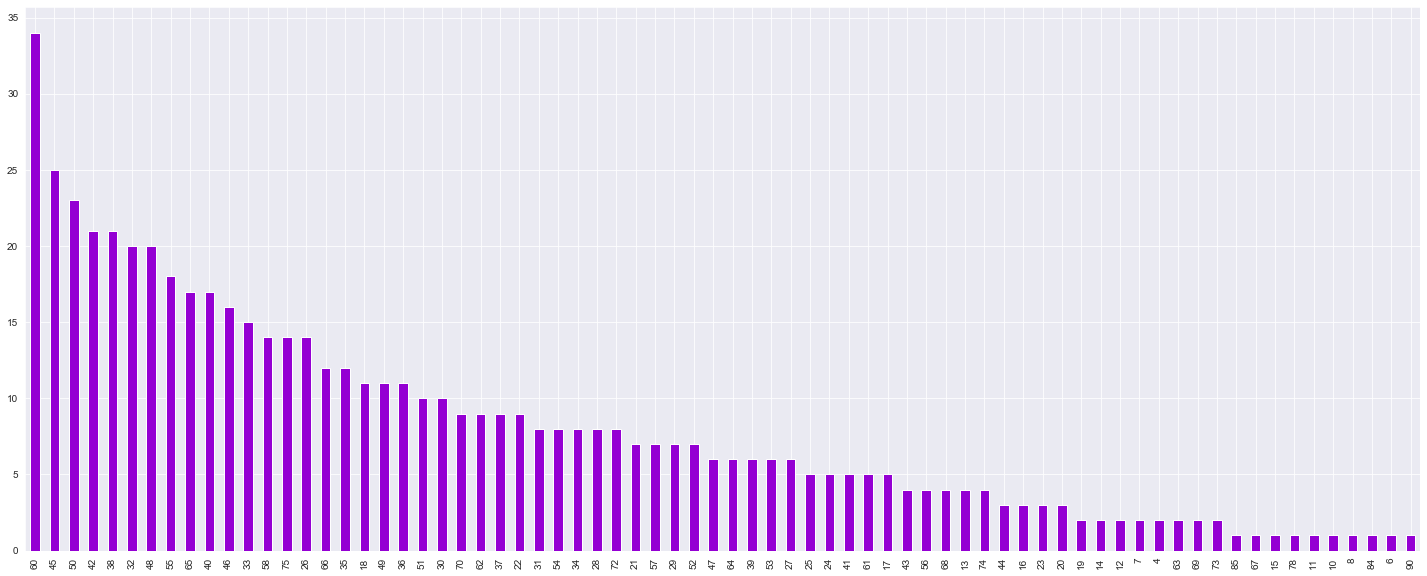

In [14]:
# Number of Liver Patients according to Age
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
liver_data['Age'].value_counts().plot.bar(color='darkviolet')

# Data Tunning 

In [15]:
# Converting categorical variable "Gender" to indicator variables.
pd.get_dummies(liver_data['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [16]:
# Concatinating the dummies in the main data
liver_data = pd.concat([liver_data,pd.get_dummies(liver_data['Gender'], prefix = 'Gender')], axis=1)
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No,0,1


In [17]:
# Checking the number of counts of Class.
liver_data.Class.value_counts()

No     416
Yes    167
Name: Class, dtype: int64

In [18]:
# Changing Class Column to numeric format.
liver_data['Class']=liver_data['Class'].apply(lambda x:1 if x=='Yes' else 0)
liver_data.Class.value_counts()

0    416
1    167
Name: Class, dtype: int64

In [19]:
# Again Checking the datatypes of all variables.
liver_data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                           int64
Gender_Female                   uint8
Gender_Male                     uint8
dtype: object

In [20]:
# Removing the original Gender variable.
liver_data = liver_data.drop(['Gender'], axis=1)
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,0,1


In [21]:
# Creating  copies of the dataframe
liver_data_rev = pd.DataFrame.copy(liver_data)
liver_data_rev.shape

liver_data_rev_ups = pd.DataFrame.copy(liver_data)
liver_data_rev_ups.shape

(583, 12)

# Machine Learning 

In [22]:
# Defining X and Y
X = liver_data_rev.drop(['Class'], axis=1)
X.head(3)
Y = liver_data_rev['Class'] # 1 for liver disease; 2 for no liver disease

# Should be performed every time to avoid unknown errors
#Y=Y.astype(int)

In [23]:
# Correlation 
corr = X.corr()
print(corr)

                                 Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.011763          0.007529   
Total_Bilirubin             0.011763         1.000000          0.874618   
Direct_Bilirubin            0.007529         0.874618          1.000000   
Alkaline_Phosphotase        0.080425         0.206669          0.234939   
Alamine_Aminotransferase   -0.086883         0.214065          0.233894   
Aspartate_Aminotransferase -0.019910         0.237831          0.257544   
Total_Protiens             -0.181356         0.003705          0.010357   
Albumin                    -0.265924        -0.222250         -0.228531   
Albumin_and_Globulin_Ratio -0.216089        -0.206159         -0.200004   
Gender_Female              -0.056560        -0.089291         -0.100436   
Gender_Male                 0.056560         0.089291          0.100436   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                  

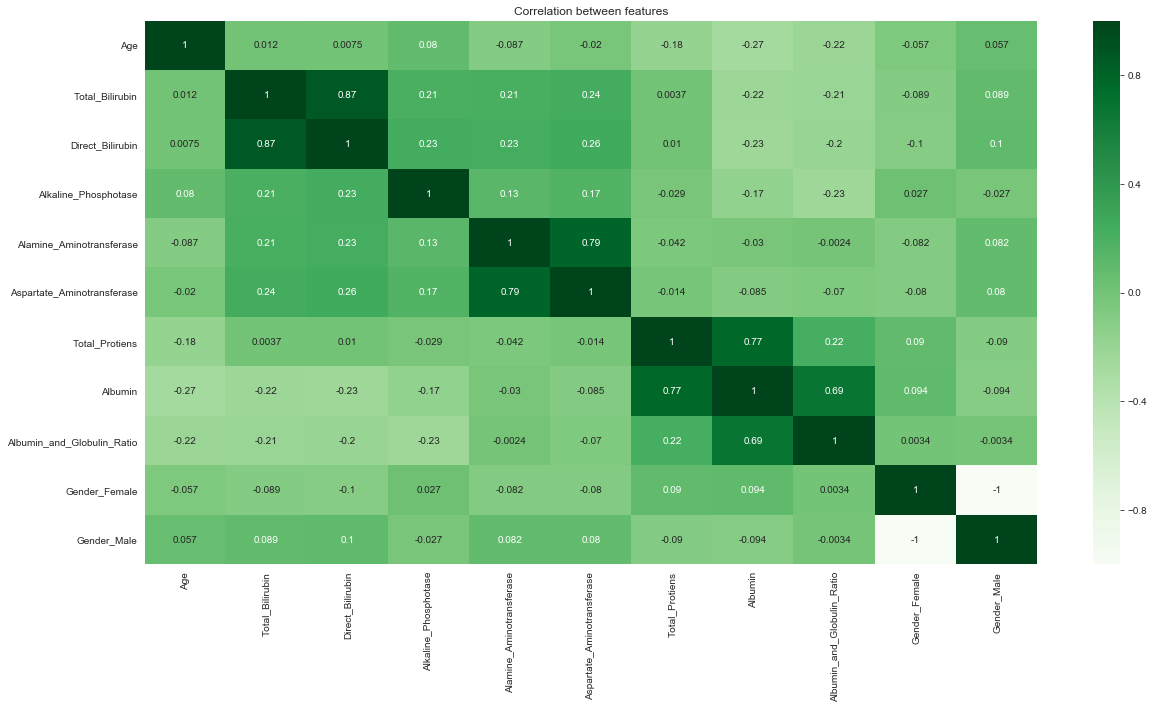

In [24]:
# Heatmap of the data
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)
#sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
 #          cmap= 'Greens')
plt.title('Correlation between features');

In [25]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 1.25209764 -0.41887783 -0.49396398 ... -0.14789798  1.76228085
  -1.76228085]
 [ 1.06663704  1.22517135  1.43042334 ... -0.65069686 -0.56744644
   0.56744644]
 [ 1.06663704  0.6449187   0.93150811 ... -0.17932291 -0.56744644
   0.56744644]
 ...
 [ 0.44843504 -0.4027597  -0.45832717 ...  0.16635131 -0.56744644
   0.56744644]
 [-0.84978917 -0.32216906 -0.35141677 ...  0.16635131 -0.56744644
   0.56744644]
 [-0.41704777 -0.37052344 -0.42269037 ...  1.73759779 -0.56744644
   0.56744644]]


## Logitic Regression 

In [26]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)   

In [27]:
print(X_train.shape)
print(X_test.shape)

(408, 11)
(175, 11)


In [28]:
from sklearn.linear_model import LogisticRegression

#create a model
logistic_model =LogisticRegression()

#fitting training data to the model
logistic_model.fit(X_train,Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Printing the Performance Parameters

#Predict Output
logistic_predicted= logistic_model.predict(X_test)

logistic_model_score = round(logistic_model.score(X_train, Y_train) * 100, 2)
logistic_model_score_test = round(logistic_model.score(X_test, Y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logistic_model_score)
print('Logistic Regression Test Score: \n', logistic_model_score_test)
print('Coefficient: \n', logistic_model.coef_)
print('Intercept: \n', logistic_model.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,logistic_predicted))

print('Confusion Matrix: \n', confusion_matrix(Y_test,logistic_predicted))
print('Classification Report: \n', classification_report(Y_test,logistic_predicted))

Logistic Regression Training Score: 
 74.75
Logistic Regression Test Score: 
 70.29
Coefficient: 
 [[-0.40556419 -0.27191308 -0.83318985 -0.37582483 -1.20902345 -0.75989099
  -0.54509191  0.65641092 -0.18571089  0.00467244 -0.00467244]]
Intercept: 
 [-1.63221058]
Accuracy: 
 0.7028571428571428
Confusion Matrix: 
 [[114  12]
 [ 40   9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       126
           1       0.43      0.18      0.26        49

    accuracy                           0.70       175
   macro avg       0.58      0.54      0.54       175
weighted avg       0.65      0.70      0.66       175



In [30]:
liver_data_rev_ups.Class.value_counts()

0    416
1    167
Name: Class, dtype: int64

### As we can see that precision of 0 is more and precision of 1 is less.And here the more important Class is 1. So now I will Upsample the data.

# Upsampling the Data 

In [31]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = liver_data_rev_ups[liver_data_rev_ups.Class==0]
df_minority = liver_data_rev_ups[liver_data_rev_ups.Class==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()

1    416
0    416
Name: Class, dtype: int64

In [32]:
# Defining X and Y
X = df_upsampled.drop(['Class'], axis=1)
Y = df_upsampled['Class']

X.head(3)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [33]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 1.31929811 -0.36813594 -0.43897509 ... -0.20458913  1.73762012
  -1.73762012]
 [ 1.13104244  1.55193588  1.79483086 ... -0.71425759 -0.57549978
   0.57549978]
 [ 1.13104244  0.87426347  1.21569598 ... -0.2364434  -0.57549978
   0.57549978]
 ...
 [-0.18674721 -0.33048747 -0.39760831 ...  0.11395366  1.73762012
  -1.73762012]
 [-0.87701797 -0.34931171 -0.39760831 ...  1.06958203  1.73762012
  -1.73762012]
 [-0.56325853 -0.33048747 -0.39760831 ...  0.75103924 -0.57549978
   0.57549978]]


In [34]:
# Splitting the data in training and testing.
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


## Logistic Regression on Upsampled Data

In [35]:
# Applying logistic regression
from sklearn.linear_model import LogisticRegression

#create a model
logistic_model =LogisticRegression()

#fitting training data to the model
logistic_model.fit(X_train,Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Printing the Performance Parameters

#Predict Output
logistic_predicted= logistic_model.predict(X_test)

logistic_model_score = round(logistic_model.score(X_train, Y_train) * 100, 2)
logistic_model_score_test = round(logistic_model.score(X_test, Y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logistic_model_score)
print('Logistic Regression Test Score: \n', logistic_model_score_test)
print('Coefficient: \n', logistic_model.coef_)
print('Intercept: \n', logistic_model.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,logistic_predicted))

print('Confusion Matrix: \n', confusion_matrix(Y_test,logistic_predicted))
print('Classification Report: \n', classification_report(Y_test,logistic_predicted))

Logistic Regression Training Score: 
 68.73
Logistic Regression Test Score: 
 67.6
Coefficient: 
 [[-0.39914345 -0.32561176 -0.94624091 -0.20207678 -1.61228902 -0.845712
  -0.28582812  0.37484637 -0.19750402 -0.02741102  0.02741102]]
Intercept: 
 [-0.52242359]
Accuracy: 
 0.676
Confusion Matrix: 
 [[ 69  61]
 [ 20 100]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.53      0.63       130
           1       0.62      0.83      0.71       120

    accuracy                           0.68       250
   macro avg       0.70      0.68      0.67       250
weighted avg       0.70      0.68      0.67       250



## Applying the algorithms on Upsampled data

## Gaussian Naive Bayes 

In [37]:
# Fitting Naive bayes to the dataset
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
# Printing the Performance Parameters

#Predict Output
nb_predicted= nb_model.predict(X_test)

nb_model_score = round(nb_model.score(X_train, Y_train) * 100, 2)
nb_model_score_test = round(nb_model.score(X_test, Y_test) * 100, 2)

#Equation coefficient and Intercept
print('Naive Bayes Training Score: \n', nb_model_score)
print('Naive Bayes Test Score: \n', nb_model_score_test)
print('Accuracy: \n', accuracy_score(Y_test,nb_predicted))

print('Confusion Matrix: \n', confusion_matrix(Y_test,nb_predicted))
print('Classification Report: \n', classification_report(Y_test,nb_predicted))

Naive Bayes Training Score: 
 67.7
Naive Bayes Test Score: 
 66.8
Accuracy: 
 0.668
Confusion Matrix: 
 [[ 52  78]
 [  5 115]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.40      0.56       130
           1       0.60      0.96      0.73       120

    accuracy                           0.67       250
   macro avg       0.75      0.68      0.65       250
weighted avg       0.76      0.67      0.64       250



## Support Vector Machine 

In [39]:
# Fitting SVM to the dataset
from sklearn import svm
svm_model = svm.SVC (kernel ='rbf')
svm_model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
# Printing the Performance Parameters

#Predict Output
svm_predicted= svm_model.predict(X_test)

svm_model_score = round(svm_model.score(X_train, Y_train) * 100, 2)
svm_model_score_test = round(svm_model.score(X_test, Y_test) * 100, 2)

#Equation coefficient and Intercept
print('SVM Training Score: \n', svm_model_score)
print('SVM Test Score: \n', svm_model_score_test)
print('Accuracy: \n', accuracy_score(Y_test,svm_predicted))

print('Confusion Matrix: \n', confusion_matrix(Y_test,svm_predicted))
print('Classification Report: \n', classification_report(Y_test,svm_predicted))

SVM Training Score: 
 74.57
SVM Test Score: 
 69.6
Accuracy: 
 0.696
Confusion Matrix: 
 [[ 71  59]
 [ 17 103]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.55      0.65       130
           1       0.64      0.86      0.73       120

    accuracy                           0.70       250
   macro avg       0.72      0.70      0.69       250
weighted avg       0.72      0.70      0.69       250



## Random Forest 

In [41]:
# Fitting Random Forest to the dataset
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10 , criterion='entropy' , random_state=0)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
# Printing the Performance Parameters

#Predict Output
rf_predicted= rf_model.predict(X_test)

rf_model_score = round(rf_model.score(X_train, Y_train) * 100, 2)
rf_model_score_test = round(rf_model.score(X_test, Y_test) * 100, 2)

#Equation coefficient and Intercept
print('Random Forest Training Score: \n', rf_model_score)
print('Random Forest Test Score: \n', rf_model_score_test)
print('Accuracy: \n', accuracy_score(Y_test,rf_predicted))

print('Confusion Matrix: \n', confusion_matrix(Y_test,rf_predicted))
print('Classification Report: \n', classification_report(Y_test,rf_predicted))

Random Forest Training Score: 
 99.66
Random Forest Test Score: 
 83.2
Accuracy: 
 0.832
Confusion Matrix: 
 [[ 97  33]
 [  9 111]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.75      0.82       130
           1       0.77      0.93      0.84       120

    accuracy                           0.83       250
   macro avg       0.84      0.84      0.83       250
weighted avg       0.85      0.83      0.83       250



## K-Nearest Neighborhood

In [43]:
# Fitting the K-NN to the Training Set
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
# Printing the Performance Parameters

#Predict Output
knn_predicted= knn_model.predict(X_test)

knn_model_score = round(knn_model.score(X_train, Y_train) * 100, 2)
knn_model_score_test = round(knn_model.score(X_test, Y_test) * 100, 2)

#Equation coefficient and Intercept
print('KNN Training Score: \n', knn_model_score)
print('KNN Test Score: \n', knn_model_score_test)
print('Accuracy: \n', accuracy_score(Y_test,knn_predicted))

print('Confusion Matrix: \n', confusion_matrix(Y_test,knn_predicted))
print('Classification Report: \n', classification_report(Y_test,knn_predicted))

KNN Training Score: 
 78.52
KNN Test Score: 
 70.0
Accuracy: 
 0.7
Confusion Matrix: 
 [[ 75  55]
 [ 20 100]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.58      0.67       130
           1       0.65      0.83      0.73       120

    accuracy                           0.70       250
   macro avg       0.72      0.71      0.70       250
weighted avg       0.72      0.70      0.70       250



## Interpretation 

<table align="left">
  <tr>
    <th>Algorithms</th>
    <th>Accuracy in %</th>
    <th>F1-Score(Class 0) in %</th>
    <th>F1-Score(Class 1) in %</th>
  </tr>
  <tr>
    <td>Logistic Regression (Before Up-sampling)</td>
    <td>70.28</td>
    <td>81</td> 
    <td>26</td>  
  </tr>
    <tr>
    <td>Logistic Regression (After Up-sampling)</td>
    <td>67.6</td>
    <td>63</td> 
    <td>71</td>  
  </tr>
    <tr>
    <td>Gaussian Naïve Bayes</td>
    <td>66.8</td>
    <td>56</td> 
    <td>73</td>  
  </tr>
    <tr>
    <td>Support Vector Machine</td>
    <td>69.6</td>
    <td>65</td> 
    <td>73</td>  
  </tr>
    <tr>
    <td>Random Forest</td>
    <td>83.2</td>
    <td>82</td> 
    <td>84</td>  
  </tr>
    <tr>
    <td>K-Nearest Neighbourhood</td>
    <td>70</td>
    <td>67</td> 
    <td>73</td>  
</table>


### From the above results we can conclude that Random Forest Algorithm predict most of the cases accurately with Accuracy of 83.2 % and F1-Score of 84 % for Class 1 and 82% for Class 0.